In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [54]:
#Load Dataset
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train = pd.read_csv('adult-training.csv', names=columns)
test = pd.read_csv('adult-test.csv', names=columns, skiprows=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [55]:
df = pd.concat([train, test], axis=0)
dff=df
k=df

df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [56]:
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [57]:
df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)

df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


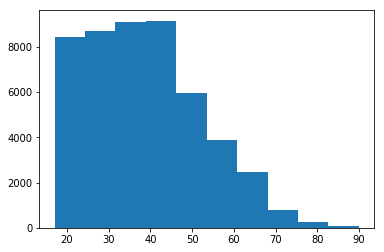

In [58]:
plt.hist(dff['Age']);

dff['Income'] = dff['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)
#The output for the this line of code can be viewed at https://tinyurl.com/y8ddex6h

In [59]:
X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

In [60]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [61]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [62]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.296032 using {'learning_rate': 0.3}
-0.687382 (0.000035) with: {'learning_rate': 0.0001}
-0.640217 (0.000324) with: {'learning_rate': 0.001}
-0.413985 (0.001812) with: {'learning_rate': 0.01}
-0.301070 (0.004352) with: {'learning_rate': 0.1}
-0.297121 (0.004607) with: {'learning_rate': 0.2}
-0.296032 (0.005016) with: {'learning_rate': 0.3}


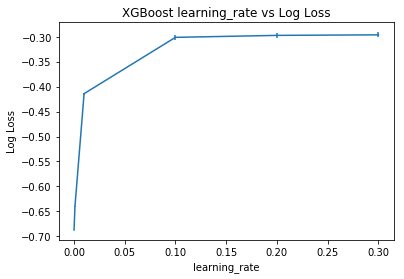

In [63]:
from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy
from matplotlib import pyplot
from pandas import read_csv

In [65]:
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.294436 using {'learning_rate': 0.2, 'n_estimators': 300}
-0.687382 (0.000035) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.681728 (0.000070) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.676184 (0.000103) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.670749 (0.000136) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.665417 (0.000168) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.640217 (0.000324) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.596314 (0.000596) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.559486 (0.000797) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.528268 (0.000967) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.501646 (0.001122) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.413985 (0.001812) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.344800 (0.002934) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.322628 (0.003469) with: {'learning_rate': 0.01, 'n_e

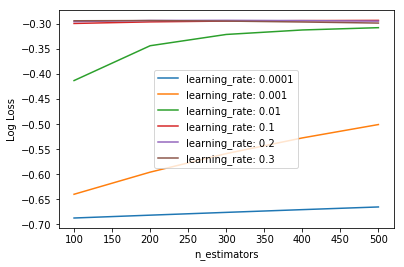

In [66]:
cores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

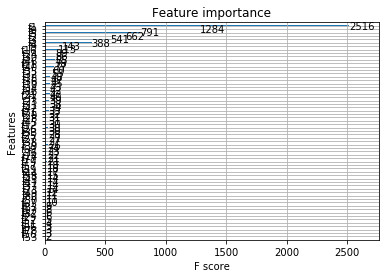

training set auc: 0.8624219469751254
test set auc: 0.8624219469751254
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


In [70]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

In [71]:
XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))

The Accuracy  is 0.8624219469751254
